# Padmaja 19BAI1107 - PCA own dataset


# Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# Loading dataset

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#### Inference : Here we can see that attributes Sex BP and Cholestrol are of object datatype. We need to convert them to integers so that we can use the attributes in the model.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


### Data preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
def data_encoding(df):
    df.Sex = LabelEncoder().fit_transform(df.Sex)
    df.BP = LabelEncoder().fit_transform(df.BP)
    df.Cholesterol = LabelEncoder().fit_transform(df.Cholesterol)

In [8]:
data_encoding(df)
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  DrugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            1   14.020  drugX
199   40    0   1            1   11.349  drugX

[200 rows x 6 columns]


In [9]:
X=df.iloc[:, :-1]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Converting string value to int type for labels

In [11]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
drug_encoder = LabelEncoder()
y = drug_encoder.fit_transform(y)
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

#### Data Standardisation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Exploratory data analysis

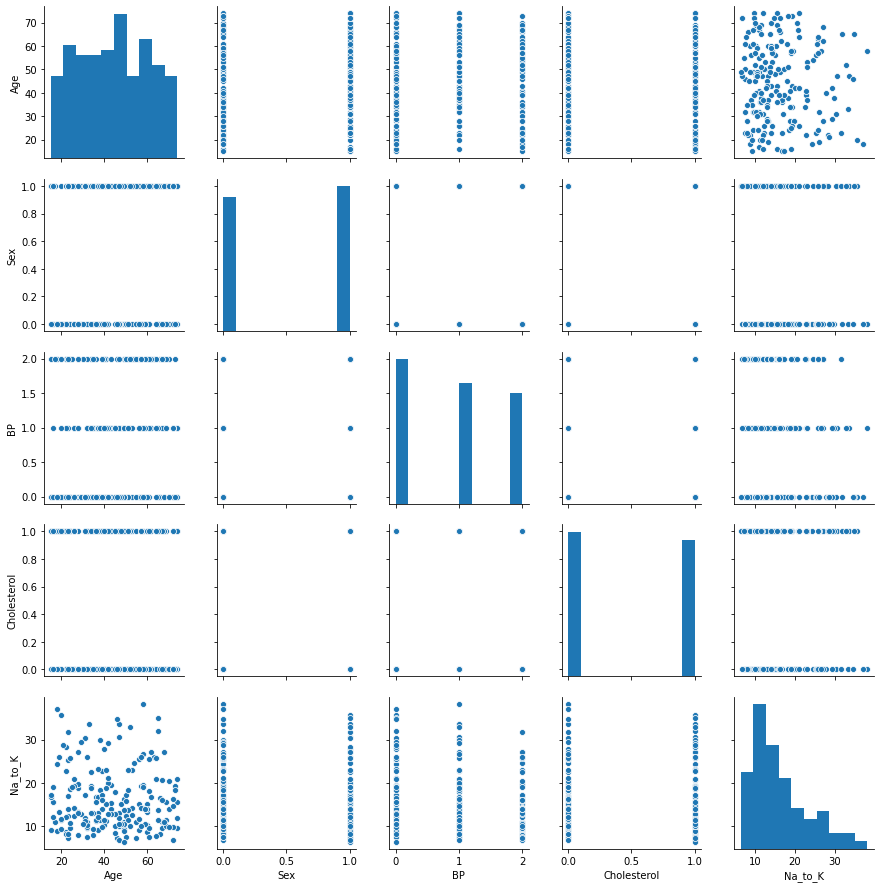

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Drug', ylabel='count'>

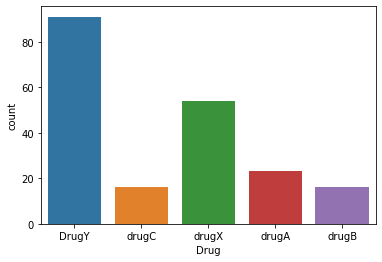

In [14]:
sns.countplot(x='Drug', data=df)

#### Inference : From this count plot we can infer that Drug Y has been used most by people

<AxesSubplot:>

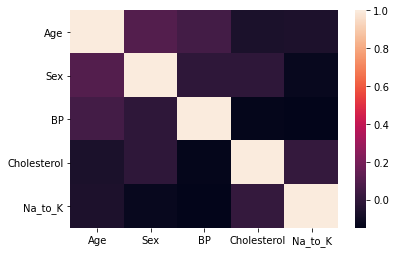

In [15]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Drug', ylabel='Age'>

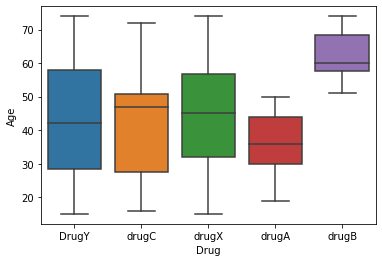

In [16]:
sns.boxplot(x="Drug", y="Age", data=df)

#### Inference : From this boxplot we can see that Drug Y which has been used most is popular among the age group 40-45. Likewise Drug C is common in the age group of 47, Drug X  in the age group of 46, Drug A in the age group of 37 and Drug B in the age group of 60.

# Splitting into train and test set

In [17]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Scaling the data

In [19]:
#Using standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Eigen decomposition of the covariance matrix.

In [20]:
import numpy as np
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.38371704 1.14125377 1.0793984  0.68228769 0.74931432]


# Total and explained variance

In [21]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Feature Transform

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Note: The aut added the `key=lambda k: k[0]` in the sort call above
# This is to avoid problems if there are ties in the eigenvalue
# arrays (i.e., the sorting algorithm will only regard the
# first element of the tuples, now).

In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.60794908  0.22973902]
 [ 0.47907075  0.59072412]
 [ 0.40360266 -0.60666456]
 [-0.18468343  0.42679965]
 [-0.45153744  0.21923768]]


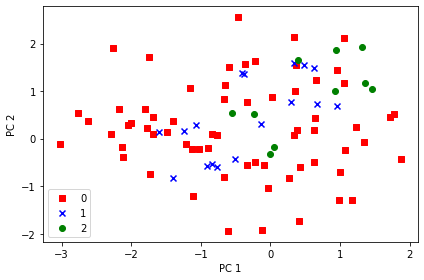

In [24]:
X_train_pca = X_train.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [25]:
X_train[0].dot(w)

array([0.92613083, 1.00222603])

# Principal component analysis in scikit-learn

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.27476667, 0.22662039, 0.21433768, 0.14879241, 0.13548284])

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

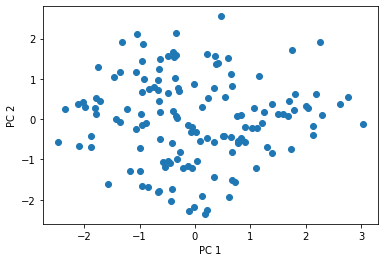

In [28]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# PCA with GridSearchCV

In [30]:
from sklearn.decomposition import PCA
pca=PCA()
param_grid={'n_components':[0,1,2,3,4]}
#Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [31]:
g=GridSearchCV(pca,param_grid=param_grid)

In [32]:
g.fit(X_train,y_train)

GridSearchCV(estimator=PCA(), param_grid={'n_components': [0, 1, 2, 3, 4]})

In [33]:
g.best_params_  #so we will be using n_components as 10 in our model

{'n_components': 3}

# Creating model after finding best parameters

In [34]:
#using PCA with best parameters
pca=PCA(n_components=5)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [35]:
X1=X_test
y1=y_test

# Using Random Forests

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
#Getting Predictions:
rfcpred=rfc.predict(X1)


# Evaluating Random Forests

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [40]:
print(confusion_matrix(y1,rfcpred))

[[22  0  2  0  2]
 [ 1  5  0  0  0]
 [ 0  0  6  0  0]
 [ 4  1  0  3  1]
 [ 1  1  0  0 11]]


In [41]:
a1=accuracy_score(y1,rfcpred)
print(a1)

0.7833333333333333


In [42]:
print(classification_report(y1,rfcpred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.71      0.83      0.77         6
           2       0.75      1.00      0.86         6
           3       1.00      0.33      0.50         9
           4       0.79      0.85      0.81        13

    accuracy                           0.78        60
   macro avg       0.81      0.77      0.75        60
weighted avg       0.81      0.78      0.77        60



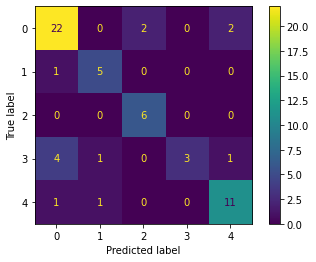

In [43]:
plot_confusion_matrix(rfc,X1,y1)

In [44]:
#Defining a function for showing results:(for future models so we dont have to keep typing the same set of commands)
def result(model,prediction):
    print('Accuracy Score:',accuracy_score(y1,prediction))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y1,prediction))
    print('\n')
    print('Classification report:\n',classification_report(y1,prediction))
    plot_confusion_matrix(model,X1,y1)

# Using SVC

In [45]:
from sklearn.svm import SVC

In [46]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X1)

# Evaluating SVC

In [47]:
a2=accuracy_score(y1,svc_pred)
print(a2)

0.8


Accuracy Score: 0.8


Confusion Matrix:
 [[22  0  1  0  3]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 5  0  0  2  2]
 [ 1  0  0  0 12]]


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       1.00      1.00      1.00         6
           2       0.86      1.00      0.92         6
           3       1.00      0.22      0.36         9
           4       0.71      0.92      0.80        13

    accuracy                           0.80        60
   macro avg       0.87      0.80      0.78        60
weighted avg       0.83      0.80      0.77        60



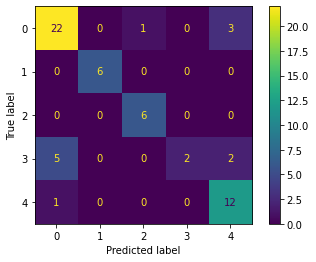

In [48]:
result(svc,svc_pred)

# Using AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
abpred=ab.predict(X1)

# Evaluating Adaboost

In [51]:
a3=accuracy_score(y1,abpred)
print(a3)

0.5


Accuracy Score: 0.5


Confusion Matrix:
 [[20  3  0  0  3]
 [ 1  5  0  0  0]
 [ 1  4  1  0  0]
 [ 8  1  0  0  0]
 [ 8  1  0  0  4]]


Classification report:
               precision    recall  f1-score   support

           0       0.53      0.77      0.62        26
           1       0.36      0.83      0.50         6
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         9
           4       0.57      0.31      0.40        13

    accuracy                           0.50        60
   macro avg       0.49      0.42      0.36        60
weighted avg       0.49      0.50      0.44        60



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


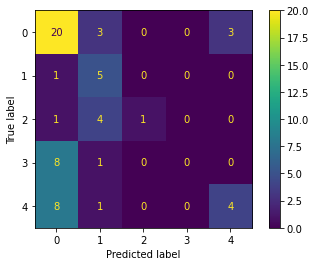

In [52]:
result(ab,abpred)

# Using GradientDescent Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gd=GradientBoostingClassifier()
gd.fit(X_train,y_train)
gdpred=gd.predict(X1)

# Evaluating GradientBoosting

In [55]:
a4=accuracy_score(y1,gdpred)
print(a4)

0.75


Accuracy Score: 0.75


Confusion Matrix:
 [[22  0  2  0  2]
 [ 1  5  0  0  0]
 [ 1  0  5  0  0]
 [ 6  0  0  1  2]
 [ 1  0  0  0 12]]


Classification report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       1.00      0.83      0.91         6
           2       0.71      0.83      0.77         6
           3       1.00      0.11      0.20         9
           4       0.75      0.92      0.83        13

    accuracy                           0.75        60
   macro avg       0.83      0.71      0.70        60
weighted avg       0.79      0.75      0.71        60



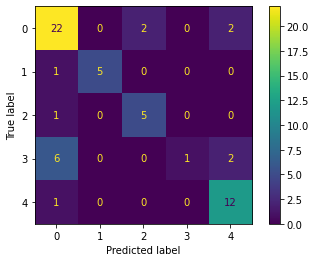

In [56]:
result(gd,gdpred)

# Using Decision Trees

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dtpred=dt.predict(X1)

# Evaluating Decision Tree

In [59]:
a5=accuracy_score(y1,dtpred)
print(a5)

0.7166666666666667


Accuracy Score: 0.7166666666666667


Confusion Matrix:
 [[20  0  2  0  4]
 [ 1  4  1  0  0]
 [ 1  1  4  0  0]
 [ 2  0  2  5  0]
 [ 2  1  0  0 10]]


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.67      0.67      0.67         6
           2       0.44      0.67      0.53         6
           3       1.00      0.56      0.71         9
           4       0.71      0.77      0.74        13

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.68        60
weighted avg       0.75      0.72      0.72        60



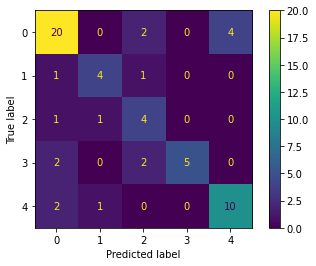

In [60]:
result(dt,dtpred)

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred=knn.predict(X1)

# Evaluating KNN

In [63]:
a6=accuracy_score(y1,knnpred)
print(a6)

0.7666666666666667


Accuracy Score: 0.7666666666666667


Confusion Matrix:
 [[21  0  0  0  5]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 6  0  0  2  1]
 [ 1  0  1  0 11]]


Classification report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       1.00      1.00      1.00         6
           2       0.86      1.00      0.92         6
           3       1.00      0.22      0.36         9
           4       0.65      0.85      0.73        13

    accuracy                           0.77        60
   macro avg       0.85      0.78      0.76        60
weighted avg       0.80      0.77      0.74        60



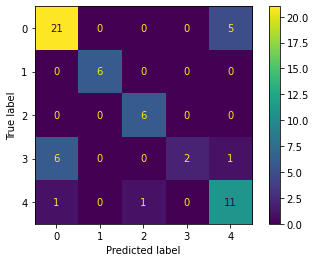

In [64]:
result(knn,knnpred)

# Using Logistics Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lor=LogisticRegression(max_iter=1000)
lor.fit(X_train,y_train)
lrpred=lor.predict(X1)

# Evaluating Logistic regression

In [67]:
a7=accuracy_score(y1,lrpred)
print(a7)

0.8166666666666667


Accuracy Score: 0.8166666666666667


Confusion Matrix:
 [[21  1  1  0  3]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 3  3  0  3  0]
 [ 0  0  0  0 13]]


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.60      1.00      0.75         6
           2       0.86      1.00      0.92         6
           3       1.00      0.33      0.50         9
           4       0.81      1.00      0.90        13

    accuracy                           0.82        60
   macro avg       0.83      0.83      0.78        60
weighted avg       0.85      0.82      0.80        60



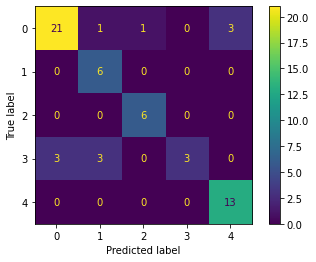

In [68]:
result(lor,lrpred)

# Plotting a receiver operating characteristic

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


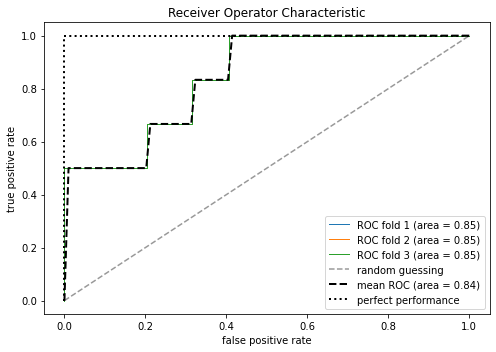

In [69]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])




#cv = StratifiedKFold(y_train,n_folds=3,random_state=1)
    
#else:
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_test,
                         y_test).predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test,
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [70]:
pipe_lr = pipe_lr.fit(X_train, y_train)
y_labels = pipe_lr.predict(X_test)
y_probas = pipe_lr.predict_proba(X_test)
# note that we use probabilities for roc_auc
# the `[:, 1]` selects the positive class label only

In [71]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_probas,multi_class="ovr"))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_labels))

ROC AUC: 0.668
Accuracy: 0.367


# OBSERVATION

In [72]:
x=[]
x.append(a1*100)
x.append(a2*100)
x.append(a3*100)
x.append(a4*100)
x.append(a5*100)
x.append(a6*100)
x.append(a7*100)

In [73]:
inference={'Model Used':['RandomForests','SVM','AdaBoost','GradientBoost','DecisionTree','KNN','LogisticRegression'],
            'Accuracy Scores(%)':x}

In [74]:
df2=pd.DataFrame(inference)

In [75]:
df2

,Model Used,Accuracy Scores(%)
0,RandomForests,78.333333
1,SVM,80.000000
2,AdaBoost,50.000000
3,GradientBoost,75.000000
4,DecisionTree,71.666667
5,KNN,76.666667
6,LogisticRegression,81.666667


# INFERENCE
### Thus accuracy is highest for Logistic regression with 81.6% and it is the best suited model for the given dataset